# 0 - O Desafio

"Seu objetivo √© prever o sal√°rio anual (yearly_wage) de uma amostra de pessoas a partir de dados s√≥ciodemogr√°ficos anonimizados.  Para isso s√£o fornecidos dois datasets: um dataset chamado wage_train composto por 32560 linhas, 14 colunas de informa√ß√£o (features) e a vari√°vel a ser prevista (‚Äúyearly_wage‚Äù). 

O segundo dataset chamado de wage_test possui 16281 linhas e 14 colunas e n√£o possui a coluna ‚Äúyearly_wage‚Äù. Seu objetivo √© prever essa coluna a partir dos dados enviados e nos enviar para avalia√ß√£o dos resultados."


    A solu√ß√£o para o problema apresentado √© a classifica√ß√£o bin√°ria, onde buscamos categorizar em dois valores poss√≠veis, as respostas do modelo preditivo.

# 1 -  Tratamento e An√°lise Explorat√≥ria dos Dados(EDA)

Vamos preparar o ambiente IPython para cumprir todos os requerimentos e importar todas as bibliotecas e m√≥dulos utilizadas neste trabalho

In [1]:
# importando bibliotecas e pacotes e preparando o ambiente de execu√ß√£o
import warnings
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import joblib

plt.style.use('seaborn-talk')
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df = pd.read_csv('./data/wage_train.csv')
df


Unnamed: 0  age          workclass  fnlwgt    education  education_num  \
0               0   50   Self-emp-not-inc   83311    Bachelors             13   
1               1   38            Private  215646      HS-grad              9   
2               2   53            Private  234721         11th              7   
3               3   28            Private  338409    Bachelors             13   
4               4   37            Private  284582      Masters             14   
...           ...  ...                ...     ...          ...            ...   
32555       32555   27            Private  257302   Assoc-acdm             12   
32556       32556   40            Private  154374      HS-grad              9   
32557       32557   58            Private  151910      HS-grad              9   
32558       32558   22            Private  201490      HS-grad              9   
32559       32559   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

      yearly_wage  
0           <=50K  
1           <=50K  
2           <=50K  
3           <=50K  
4           <=50K  
...           ...  
32555       <=50K  
32556        >50K  
32557       <=50K  
32558       <=50K  
32559        >50K  

[32560 rows x 16 columns]

Ap√≥s inspe√ß√£o preliminar dos dados, verificamos que a primeira coluna do arquivo foi importada como *'Unnamed: 0'* e que se trata de um √≠ndice num√©rico das linhas do arquivo, e por isso foi dado como desnecess√°ria e removida do dataframe **pandas**, pelo fato do objeto j√° ter essa funcionalidade nativa.

In [3]:
# removendo coluna de √≠ndice carregada a partir do arquivo csv
df.drop('Unnamed: 0', axis=1, inplace=True)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  yearly_wage     32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Os resultados do m√©todo **info** revelam que n√£o h√° valores nulos no dataframe e que o **pandas** identificou corretamente os tipos de dados das vari√°veis carregadas, num total de 6 num√©ricas e 9 categ√≥ricas.
    Vamos investigar mais a fundo os dados para verificar se encontramos valores faltantes (*missing values*) ou registros com formato corrompido. Para isso vamos conferir os valores √∫nicos de cada coluna categ√≥rica.

In [5]:
# lista de vari√°veis categ√≥ricas
categorical = df.columns[df.dtypes==object].tolist()

# lista de vari√°veis num√©ricas
numerical = df.columns[df.dtypes=='int64'].tolist()

# inpsecionando os dados categ√≥ricos para conferir os valores √∫nicos 
for column in categorical:
    print(f'\033[1m======= Vari√°vel: \'{column}\' =======\033[0m')
    print(list(df[column].unique()), '\n')


======= Vari√°vel: 'workclass' =======
[' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'] 

======= Vari√°vel: 'education' =======
[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'] 

======= Vari√°vel: 'marital_status' =======
[' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'] 

======= Vari√°vel: 'occupation' =======
[' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv'] 

======= Vari√°vel: 'relationship' =======
[' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Un

Verificamos que os valores faltantes nesse conjunto de dados foi representado por *' ?'* e devemos eliminar esse valor do conjunto de dados antes de prosseguirmos com os modelos de machine learning, j√° que em geral, esse tipo de registro incorreto pode prejudicar seriamente a performance dos modelos. Temos duas solu√ß√µes t√≠picas para este tipo de problema, um seria eliminar os registros onde os valores faltantes ocorrem, e a outra seria substituir esses valores pela moda da distribui√ß√£o de cada vari√°vel categ√≥rica. Cada solu√ß√£o tem seus pr√≥s e contras, por isso vamos inspecionar melhor os dados a fim de decidir qual atitude tomar.

In [6]:
# contando as ocorr√™ncias dos valores faltantes
(df[df[categorical].columns] == ' ?').sum()


workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
yearly_wage          0
dtype: int64

In [7]:
# contando os registros que cont√©m ' ?' em qualquer uma das colunas selecionadas
df_missing = df[(df['workclass'] == ' ?') | (df['occupation'] == ' ?') | (df['native_country'] == ' ?')]
df_missing.shape


(2399, 15)

A quantidade de registros com pelo menos um valor faltante √© de 2399, aproximadamente 7% do total no conjunto de dados. Considerando a op√ß√£o de remover esses registros, podemos dizer que √© uma quantidade aceit√°vel para o descarte, e nosso modelo poderia apresentar uma performance t√£o boa quanto o esperado, mesmo com essa redu√ß√£o. Vamos ainda avaliar a variabilidade dos dados contidos no dataframe tempor√°rio criado na etapa anterior e comparar com o original, a fim de conferir se a remo√ß√£o desses registros for√ßaria alguma assimetria no conjunto de dados final.

In [8]:
# inpsecionando os dados categ√≥ricos para conferir os valores √∫nicos
for column in categorical:
    print(f'\033[1m======= Vari√°vel: \'{column}\' =======\033[0m')
    print(list(df_missing[column].unique()), '\n')
    

======= Vari√°vel: 'workclass' =======
[' Private', ' ?', ' State-gov', ' Self-emp-not-inc', ' Self-emp-inc', ' Local-gov', ' Federal-gov', ' Never-worked'] 

======= Vari√°vel: 'education' =======
[' Assoc-voc', ' Some-college', ' HS-grad', ' 7th-8th', ' 10th', ' 1st-4th', ' Bachelors', ' Masters', ' 11th', ' Assoc-acdm', ' 12th', ' 5th-6th', ' 9th', ' Doctorate', ' Prof-school', ' Preschool'] 

======= Vari√°vel: 'marital_status' =======
[' Married-civ-spouse', ' Never-married', ' Married-spouse-absent', ' Divorced', ' Widowed', ' Separated', ' Married-AF-spouse'] 

======= Vari√°vel: 'occupation' =======
[' Craft-repair', ' ?', ' Sales', ' Other-service', ' Adm-clerical', ' Exec-managerial', ' Prof-specialty', ' Machine-op-inspct', ' Transport-moving', ' Handlers-cleaners', ' Priv-house-serv', ' Farming-fishing', ' Tech-support', ' Protective-serv'] 

======= Vari√°vel: 'relationship' =======
[' Husband', ' Own-child', ' Not-in-family', ' Wife', ' Unmarried', ' Other-relative'] 

==

Os resultados da √∫ltima inspe√ß√£o mostram que os registros apresentam uma distribui√ß√£o semelhante a do conjunto original, ent√£o parece seguro assumir que a remo√ß√£o dos registros de fato n√£o afetar√° drasticamente o comportamento dos modelos.
Antes de tomar a decis√£o pela primeira op√ß√£o, vamos conferir a distribui√ß√£o dos dados nas colunas afetadas pelos valores faltantes, no intuito de verificar o quanto uma poss√≠vel substitui√ß√£o dos valores afetaria tais distribui√ß√µes.

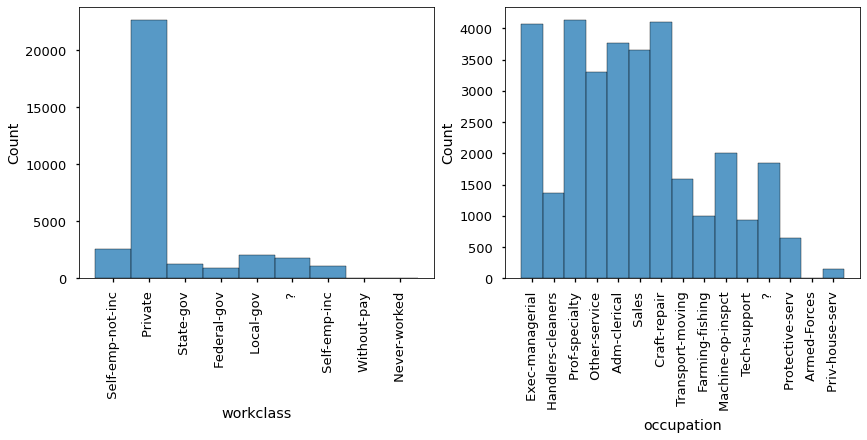

In [9]:
# plotando histogramas para inspe√ß√£o visual das vari√°veis selecionadas
missing_values_cols = ['workclass', 'occupation']
plt.figure(figsize=(14,5))
for i, col in enumerate(missing_values_cols):
    ax = plt.subplot(1, len(missing_values_cols), i+1)
    sns.histplot(data=df, x=col, ax=ax)
    plt.xticks(rotation=90)


Observando a distribui√ß√£o de `'workclass'` e `'occupation'` (as colunas com maior n√∫mero de valores faltantes) podemos ver que as duas vari√°veis apresentam comportamentos totalmente distintos. Enquanto que em `'workclass'` uma substitui√ß√£o dos valores pela moda n√£o causaria mudan√ßas significativas no panorama geral da distribui√ß√£o, `'occupation'` por outro lado teria uma mudan√ßa bem expressiva, tendo em vista que os valores predominantes na vari√°vel s√£o bem divididos entre 6 elementos, e a quantidade de valores faltantes que seria transferida para o elemento mais frequente causaria um pico na distribui√ß√£o, uma situa√ß√£o que seria prefer√≠vel de evitar para manter a consist√™ncia do conjunto de dados original.

No caso da √∫ltima vari√°vel, checamos sua distribui√ß√£o para verificar como os 583 registros onde ocorrem os valores faltantes afetariam o conjunto no caso de substitui√ß√£o.

In [10]:
df.groupby(['native_country']).size()


native_country
 ?                               583
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                

Os n√∫meros mostram uma maioria absoluta do valor *'United-States'*, totalizando quase 90%, contra menos de 2% para os valores faltantes, neste caso podemos assumir que a substitui√ß√£o dos valores faltantes n√£o causaria problemas significativos para o conjunto de dados. Encerradas as avalia√ß√µes sobre os valores faltantes, podemos perceber que na lista de pa√≠ses encontramos valores n√£o conformes, e teremos que tratar esses problemas, tais como no valor *'Columbia'*, que provavelmente se refere √† 'Colombia', *'Hong'* tamb√©m provavelmente um erro de registro, se referindo a 'Hong Kong', e aqui fazemos uma pequena ressalva, j√° que apesar de n√£o ser considerado um pa√≠s, na √©poca da consolida√ß√£o do conjunto de dados (1994), Hong Kong ainda era col√¥nia do Imp√©rio Brit√¢nico, e provavelmente considerado de relev√¢ncia para a proposta inicial do conjunto de dados. Neste caso vamos corrigir o nome e manter o valor, em vez de mudar o seu valor para a China. O √∫ltimo valor n√£o conforme √© *'South'* que poderia estar se referindo a tr√™s pa√≠ses diferentes, que n√£o temos como avaliar quais seriam, e por isso vamos manter o valor como est√°, considerando que a pequena quantidade de registros n√£o v√° causar maiores problemas para o desempenho final do modelo.

Considerando todas as an√°lises anteriores, decimos ent√£o substituir os valores faltantes nas vari√°veis que apresentam maioria absoluta de algum valor no conjunto, `'workclass'` e `'native_country'`, e remover os registros onde os valores faltantes ocorrem na vari√°vel `'occupation'`.

Outro fato relevante sobre as vari√°veis categ√≥ricas √© que `'education'` e `'education_num'` cont√©m a mesma informa√ß√£o, onde `'education_num'` √© uma codifica√ß√£o ordinal dos valores de `'education'`, na forma de tempo aproximado de estudo para cada valor. Neste caso vamos eliminar a coluna `'education'` do dataframe antes de rodar os modelos preditivos para evitar redund√¢ncia no conjunto de dados.

In [11]:
# substituindo os valores faltantes pelas respectivas modas
df['workclass'].replace(' ?', ' Private', inplace=True)
df['native_country'].replace(' ?', ' United-States', inplace=True)

# corrigindo os valores n√£o conformes na vari√°vel 'native_country'
df['native_country'].replace({' Hong':' Hong-Kong', ' Columbia': ' Colombia'}, inplace=True)

# eliminando os registros que ainda cont√©m ' ?' na vari√°vel 'occupation'
df = df[(df['occupation'] != ' ?')]
df.shape


(30717, 15)

Nosso conjunto de dados base agora est√° livre de impurezas trat√°veis e a quantidade final de registros √© 30.717.
Vamos inspecionar os mesmos gr√°ficos que plotamos anteriormente, dessa vez com os dados tratados para conferir os resultados.

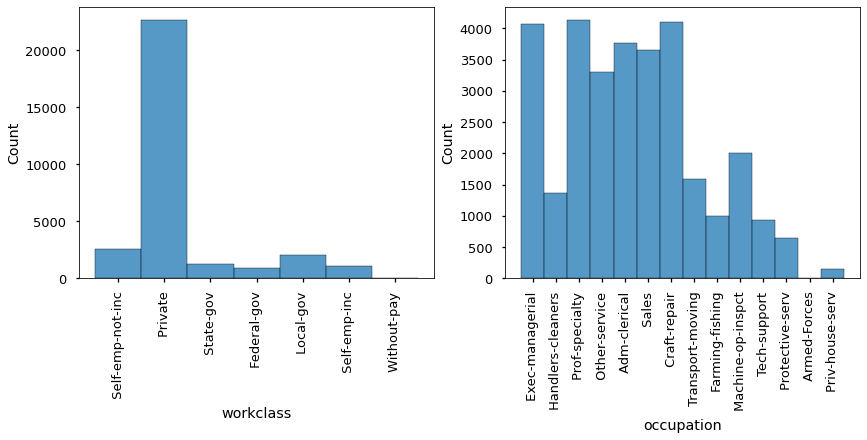

In [12]:
# plotando histogramas para inspe√ß√£o visual das vari√°veis selecionadas
plt.figure(figsize=(14,5))
for i, col in enumerate(missing_values_cols):
    ax = plt.subplot(1, len(missing_values_cols), i+1)
    sns.histplot(data=df, x=col, ax=ax)
    plt.xticks(rotation=90)

Para fins de avalia√ß√£o num√©rica e posterior modelagem dos dados, vamos aplicar uma codifica√ß√£o bin√°ria para a vari√°vel resposta `'yearly_wage'`, que √© coerente com a sua natureza que s√≥ possui dois valores poss√≠veis.

In [13]:
# codificando os valores categ√≥ricos para sua equival√™ncia bin√°ria num√©rica
df_raw = df.copy() # c√≥pia do dataframe para uso posterior
df['yearly_wage'].replace({' <=50K':0, ' >50K':1}, inplace=True)
df_raw.groupby(['yearly_wage']).size()


yearly_wage
 <=50K    23067
 >50K      7650
dtype: int64

Vemos novamente que o conjunto de dados √© desbalanceado tamb√©m na vari√°vel de resposta, tendo cerca de 3/4 dos registro com ' <=50K' e apenas 1/4 com ' >50K'.

Vamos partir para analizar as vari√°veis num√©ricas presentes no conjunto de dados e conferir se existem problemas a serem tratados nesse tipo de dado tamb√©m. Vamos come√ßar avaliando a correla√ß√£o das vari√°veis com a vari√°vel resposta atrav√©s da representa√ß√£o visual do mapa de calor.

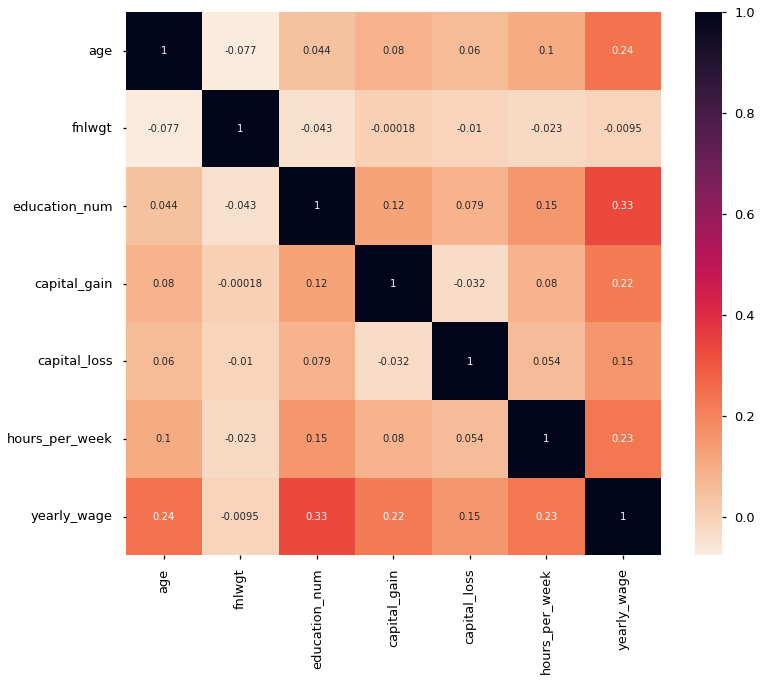

In [14]:
# plotando mapa de calor com a correla√ß√£o das vari√°veis num√©ricas
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='rocket_r')
plt.show()


O resultado acima aponta que a vari√°vel `'fnlwgt'` apresenta valores negativos de correla√ß√£o com todas as vari√°veis do conjunto, incluindo a vari√°vel resposta, al√©m de todos serem absolutamente muito baixos, e sendo assim vamos elimin√°-la do conjunto final, para evitar que a sua presen√ß√£o comprometa o desempenho dos modelos preditivos. Outra infer√™ncia poss√≠vel da representa√ß√£o acima √© que a o tempo de estudo √© a vari√°vel de maior correla√ß√£o com a possibilidade de sal√°rios mais altos, dentro do conjunto de dados. Uma hip√≥tese v√°lida e um resultado dentro do esperado.

In [15]:
# removendo coluna 'fnlwgt' do dataframe
df.drop('fnlwgt', axis=1, inplace=True)
# atualizando a lista das vari√°veis num√©ricas do conjunto de dados
numerical.remove('fnlwgt')


In [16]:
df.describe().T

count         mean          std   min   25%   50%   75%  \
age             30717.0    38.443565    13.118441  17.0  28.0  37.0  47.0   
education_num   30717.0    10.130221     2.562458   1.0   9.0  10.0  13.0   
capital_gain    30717.0  1106.002311  7497.982938   0.0   0.0   0.0   0.0   
capital_loss    30717.0    88.913110   405.663489   0.0   0.0   0.0   0.0   
hours_per_week  30717.0    40.949344    11.985576   1.0  40.0  40.0  45.0   
yearly_wage     30717.0     0.249048     0.432469   0.0   0.0   0.0   0.0   

                    max  
age                90.0  
education_num      16.0  
capital_gain    99999.0  
capital_loss     4356.0  
hours_per_week     99.0  
yearly_wage         1.0

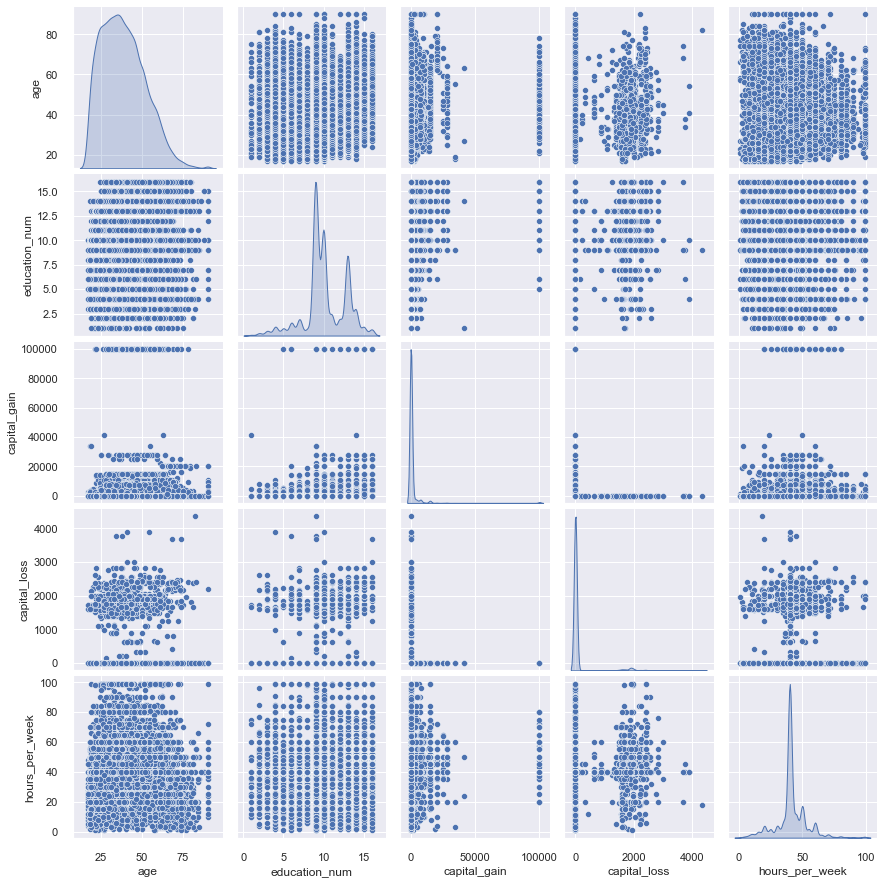

In [17]:
# visualiza√ß√£o cruzada das vari√°veis num√©ricas do conjunto de dados
sns.set()
# usando o "kde' para representar a diagonal em vez do histograma padr√£o
sns.pairplot(df[numerical], diag_kind='kde')
plt.show()


Como esperado, os valores das vari√°veis `'capital_gain'` e `'capital_loss'` s√£o altamente assim√©tricos, e al√©m disso a escala dos valores tamb√©m √© muito diferente do restante dos dados no conjunto, o que indica que precisaremos tratar esses valores com alguma transforma√ß√£o para aliviar a obliquidade e evitar a influ√™ncia negativa de eventuais *outliers*. Vamos prosseguir com a an√°lise das vari√°veis num√©ricas, dessa vez representando visualmente as medidas de posi√ß√£o obtidas anteriormente.

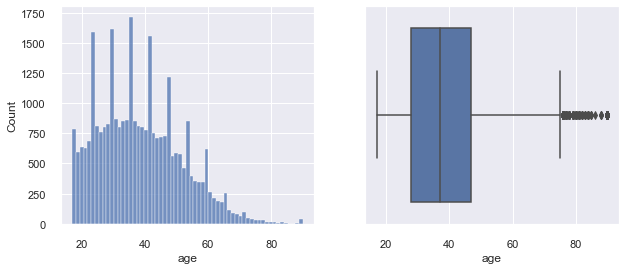

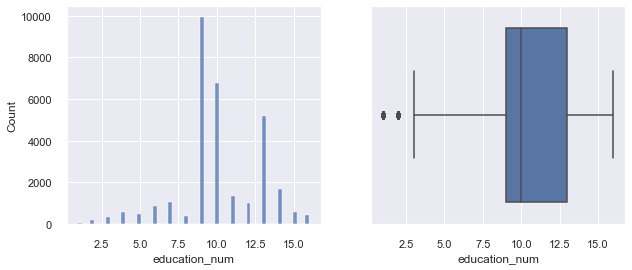

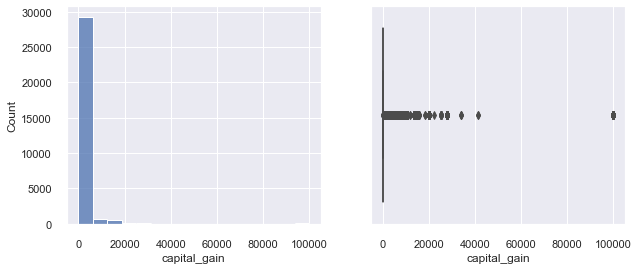

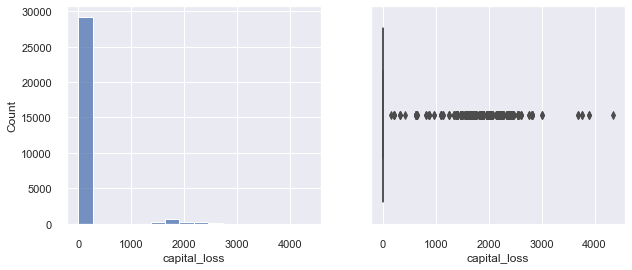

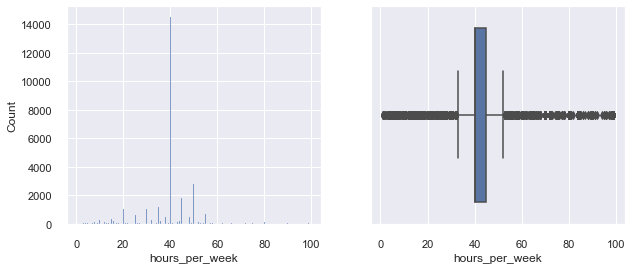

In [18]:
# plotando lado a lado o histograma e o boxplot de cada vari√°vel num√©rica
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=df, x=col, ax=ax[0])
    sns.boxplot(data=df, x=col, ax=ax[1])


Os resultados acima demonstram o padr√£o de comportamento assim√©trico positivo nas vari√°veis representadas, evidenciado pela posi√ß√£o da mediana no intervalor de quartis, deslocada para a esquerda em praticamente todas as vari√°veis.

Conclu√≠das a prepara√ß√£o e a descri√ß√£o dos dados, vamos seguir com a an√°lise explorat√≥ria para entender um pouco da popula√ß√£o no conjunto e como suas caracter√≠sticas se relacionam com a vari√°vel resposta.

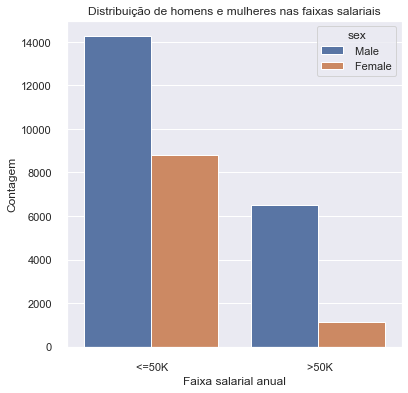

In [19]:
# plotando gr√°ficos para EDA
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df_raw, x='yearly_wage', hue='sex')
ax.set(xlabel='Faixa salarial anual')
ax.set(ylabel='Contagem')
ax.set_title('Distribui√ß√£o de homens e mulheres nas faixas salariais')
plt.show()

Considerando o grupos dos ricos (sal√°rios maiores que 50 mil), os homens representam 5x o n√∫mero de mulheres, enquanto que no grupo dos pobres (sal√°rios menores ou iguais a 50 mil) a diferen√ßa na quantidade de homens e mulheres cai drasticamente, sendo os homens menos que o dobro das mulheres.

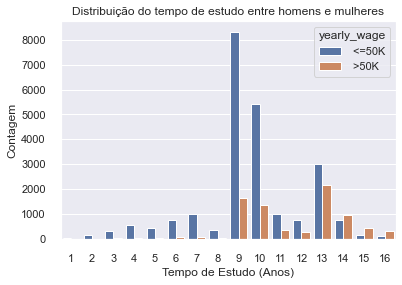

In [20]:
# plotando gr√°ficos para EDA
ax = sns.countplot(data=df_raw, x='education_num', hue='yearly_wage')
ax.set(xlabel='Tempo de Estudo (Anos)')
ax.set(ylabel='Contagem')
ax.set_title('Distribui√ß√£o do tempo de estudo entre homens e mulheres')
plt.show()

Constatamos que quase a totalidade dos indiv√≠duos no grupo dos ricos pelo menos conclu√≠ram o ensino m√©dio (9 anos), que √© tamb√©m o valor de educa√ß√£o onde ocorre a maior quantidade de indiv√≠duos dentre todos os grupos, enquanto a gradua√ß√£o superior (13 anos) √© a campe√£ de ocorr√™ncia de altos sal√°rios.

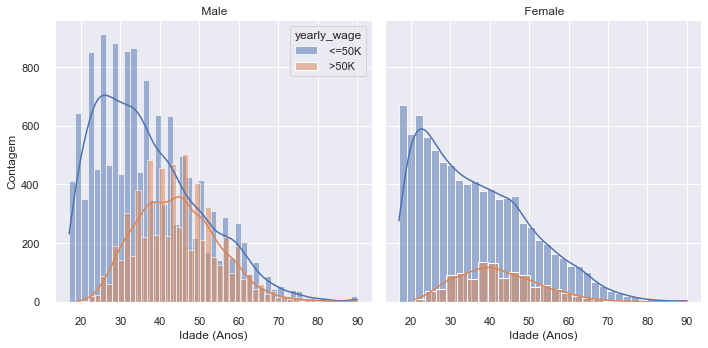

In [21]:
# plotando gr√°ficos para EDA
ax = sns.FacetGrid(data=df_raw, col="sex", hue="yearly_wage", height=5, legend_out=False)
ax.map(sns.histplot, 'age', kde=True)
ax.add_legend()
ax.set(xlabel='Idade (Anos)')
ax.set(ylabel='Contagem')
ax.set_titles("{col_name}")
plt.show()

A popula√ß√£o de mulheres no grupo dos pobres se apresenta bem concentrada entre as mais jovens, enquanto os homens se apresentam de forma melhor distribu√≠da e alguns anos mais velhos em termos de centralidade.

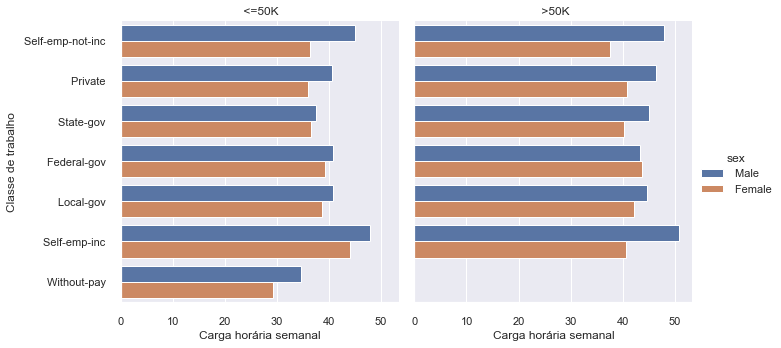

In [22]:
# plotando gr√°ficos para EDA
ax = sns.factorplot(x ='hours_per_week', y ='workclass', kind = 'bar', 
                    hue = 'sex', col='yearly_wage', data = df_raw, ci=False)
ax.set(xlabel='Carga hor√°ria semanal')
ax.set_ylabels('Classe de trabalho')
ax.set_titles("{col_name}")
plt.show()

Dentre os ricos, homens e mulheres t√™m cargas de trabalho semanais parecidas, por√©m os homens trabalham mais horas na mesma classe de trabalho. No grupo que recebe >50k, as diferen√ßas aumentam, e na categoria *' Federal-gov'* s√£o as mulheres que trabalham mais horas por semana. Nenhum dos indiv√≠duos que trabalham sem receber sal√°rio ocupa o grupo dos mais ricos.

De agora em diante, vamos fazer ajustes necess√°rios no conjunto de dados, para torn√°-lo mais favor√°vel para o trabalho dos modelos preditivos. 

In [23]:
# separando o conjunto de dados em vari√°veis preditoras e vari√°vel resposta
features_init_df = df[df.columns[:-1]]
features_init_df.drop('education', axis=1, inplace=True)
target_df = df['yearly_wage']


A transforma√ß√£o escolhida para os valores das colunas e ganho e perda de capital foi a logar√≠tmica, muito usada para fins de redu√ß√£o de escala e al√≠vio de assimetria de distribui√ß√µes.

In [24]:
# aplicando a fun√ß√£o logar√≠tmica para transformar os dados 
skewed_cols = ['capital_gain', 'capital_loss']
features_log_df = features_init_df.copy()
# log(x+1) √© um leve ajuste para lidar com o valor indefinido de log(0)
features_log_df[skewed_cols] = features_init_df[skewed_cols].apply(lambda x: np.log(x+1))


Para oferecer melhores condi√ß√µes de desempenho para os modelos, vamos aplicar a normaliza√ß√£o em todas as vari√°veis num√©ricas, a fim de eliminar as diferen√ßas de escala entre as diferentes vari√°veis, o resultado da normaliza√ß√£o afeta a escala dos dados, mas preserva o formato da distribui√ß√£o. Outra op√ß√£o seria utilizar a padroniza√ß√£o, que n√£o √© sens√≠vel aos outliers, mas como transformamos nossas vari√°veis mais problem√°ticas com a fun√ß√£o logar√≠tmica, esperamos que a normaliza√ß√£o seja uma op√ß√£o v√°lida. 

In [25]:
# instanciando um normalizador para aplicar sobre os dados
scaler = MinMaxScaler() # escala padr√£o sendo de 0 a 1

# aplicando a normaliza√ß√£o nas vari√°veis preditoras num√©ricas
features_log_normalized_df = features_log_df.copy()
features_log_normalized_df[numerical] = scaler.fit_transform(features_log_df[numerical])

A √∫ltima etapa de tratamento dos dados √© a codifica√ß√£o das vari√°veis categ√≥ricas (*encoding*), processo necess√°rio devido ao fato dos modelos preditivos trabalharem apenas no valores num√©ricos. Dessa forma precisamos definir o m√©todo de codifica√ß√£o que iremos utilizar antes de prosseguir com a cria√ß√£o dos modelos preditivos.
Existem v√°rias op√ß√µes de codifica√ß√£o poss√≠veis, cada uma com suas caracter√≠sticas, vantagens e desvantagens. Um dos principais fatores de escolha para o m√©todo de codifica√ß√£o mora na natureza da vari√°vel, onde precisamos saber se existe ou n√£o ordem hier√°rquica nas classes presentes. Em nosso conjunto de dados, uma vari√°vel j√° veio com sua pr√≥pria codifica√ß√£o ordinal, a qual foi mantida, onde o valor categ√≥rico se refere a um grau de estudo, e seu valor codificado √© um valor num√©rico cada vez maior, ao passo que aumenta o grau de estudo, no caso representado pelo tempo de estudos em anos. Todas as outras vari√°veis do conjunto apresentaram natureza nominal, onde n√£o podemos imputar ordem ou quantidade entre os valores.
Para a codifica√ß√£o nominal, usaremos o m√©todo que provavelmente √© mais utilizado, o chamado *One-Hot Encoding* onde cada valor de uma vari√°vel categ√≥rica √© associado a uma coluna combinada, onde todos os valores s√£o '1' onde o valor ocorre, e '0' em todos os outros valores. Dessa forma, se uma vari√°vel possui 5 valores √∫nicos, ser√£o geradas 5 colunas. COnsiderando o tamanho e dimensionalidade do nosso conjunto de dados, √© seguro dizer que esse m√©todo de codifica√ß√£o n√£o vai acarretar problemas de sobrecarga no processamento, mesmo em m√°quinas menos poderosas.

In [26]:
# codificando os dados em 'features_log_normalized' 
features_df = pd.get_dummies(features_log_normalized_df) # One-Hot Encoding
# removendo coluna
features_df.drop('native_country_ Holand-Netherlands', axis=1, inplace=True)

Na etapa anterior tivemos que remover a coluna *dummy* `'native_country_ Holand-Netherlands'`, porque essa ocorr√™ncia s√≥ existe no arquivo de treino, o que resulta num dimensionamento distinto entre o conjunto que ser√° usado para treinar o modelo, daquele que usaremos para gerar as predi√ß√µes. Essa diferen√ßa acarreta um erro, pois o modelo espera um n√∫mero de argumentos de entrada que n√£o ser√° entregue no conjunto de vari√°veis preditoras.

In [27]:
# mostra a quantidade final de vari√°veis no conjunto ap√≥s One-Hot Encoding 
encoded = list(features_df.columns)
print("Total de colunas no dataframe ap√≥s One-Hot Encoding: {}".format(len(encoded)))


Total de colunas no dataframe ap√≥s One-Hot Encoding: 86


Vamos dividir os dados em conjuntos de treino e de teste com a ajuda da fun√ß√£o **train_test_split**, que embaralha e divide aleatoriamente os dados, numa propor√ß√£o definida por par√¢metro, neste caso usaremos 30% para teste e 70% para treino. 

In [28]:
# dividindo os em conjuntos de teste e treino
X_train, X_test, y_train, y_test = train_test_split(features_df, 
                                    target_df, test_size =0.3, random_state=1) 

# mostra o resultado da divis√£o 
print("Tamanho do conjunto de treino: {}".format(X_train.shape[0]))
print("Tamanho do conjunto de teste: {}".format(X_test.shape[0]))

Tamanho do conjunto de treino: 21501
Tamanho do conjunto de teste: 9216


# 2 - Construindo os modelos preditivos

Vamos iniciar o processo de testes dos modelos de aprendizagem de m√°quina com suas configura√ß√µes padr√£o, sem ajustes de hiperpar√¢metros, para evitar impor qualquer predile√ß√£o entre os modelos. As escolhas dos modelos n√£o seguiu nenhum crit√©rio particular, apenas utilizamos modelos cl√°ssicos e comuns nesse tipo de classifica√ß√£o.

In [29]:
# instanciando os modelos de classifica√ß√£o
knn = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lrc = LogisticRegression()
abc = AdaBoostClassifier() #Modelo padr√£o: √Årvore de Decis√£o
gbc = GradientBoostingClassifier() #Modelo padr√£o: √Årvore de Decis√£o

# listando os modelos para facilitar o fluxo de processamento a seguir
classifiers = [knn, gnb, dtc, rfc, lrc, abc, gbc]

Vamos apresentar uma breve descri√ß√£o dos modelos utilizados no trabalho, trazendo suas caracter√≠sticas, vantagens e eventuais desvantagens:

- K-√©simo Vizinho Mais Pr√≥ximo: Um modelo simples, quase rudimentar, muito usado em aplica√ß√µes de classifica√ß√£o espectral de imagens, que diferente de outros modelos abordados aqui, n√£o trabalha com a vis√£o generalista dos dados, e sim em inst√¢ncias locais, definidas entre os k-√©simos vizinhos mais pr√≥ximos do ponto em an√°lise, e a classifica√ß√£o √© computada pela maioria de votos nas inst√¢ncias. Altamente dependente da qualidade dos dados para um bom desempenho, pode ser especialmente sens√≠vel a ru√≠dos, outliers e valores faltantes. Acaba sendo pouco indicado para conjuntos de dados muito grandes ou com dimensionalidade muito alta.

- Naive Bayes: Um classificador muito simples e r√°pido, costuma ter bons resultados mesmo em conjuntos com pequenas quantidades de amostras de treinamento, mas de todos os modelos selecionados, √© o que promete menor desempenho, principalmente por ele ser pouco indicado para problemas de classifica√ß√£o, especialmente em um conjunto de dados como o nosso, que apresenta muitas vari√°veis de distribui√ß√£o assim√©trica, vari√°veis esparsas e valores escassos. √â um modelo que trabalha sobre a presun√ß√£o de distribui√ß√£o gaussiana dos dados, e com o princ√≠pio de independ√™ncia, que implica que a exist√™ncia de um valor em um registro n√£o afeta a presen√ßa de outro.

- √Årvore de Decis√£o: Um dos modelos de classifica√ß√£o mais utilizado, tanto por sua simplicidade e clareza, quanto pela capacidade de classificar eficientemente dados num√©ricos ou categ√≥ricos, como pouco tratamento pr√©vio e consideravelmente menos esfor√ßo computacional que outros modelos. O modelo ainda mostra claramente a influ√™ncia de cada vari√°vel para o processo de aprendizagem. Apesar das vantagens, as √°rvores de decis√£o encontram dificuldades ao trabalhar com conjuntos de dados de dimensionalidade muito alta, j√° que o custo computacional passa a crescer drasticamente. Al√©m disso, o modelo √© mais suscet√≠vel a erro quando o conjunto de dados tem muitas classes a prever, e relativamente poucas amostras de treinamento.

- Florestas Aleat√≥rias: Por se tratar de um modelo "Ensemble" da √°rvore de decis√£o (como o pr√≥prio nome sugere) ele possui a maioria das vantagens do modelo fundamental, al√©m de corrigir alguns de seus problemas, como a tend√™ncia de sobreajuste com o conjunto de treinamento. Apesar disso, as florestas aleat√≥rias ainda s√£o suscet√≠veis a sobreajuste quando os dados apresentam muito ru√≠do.

- Regress√£o Log√≠stica: √â um modelo altamente apropriado para problemas de classifica√ß√£o bin√°ria, especialmente categ√≥ricas. Bastante resistente a sobreajuste e n√£o √© dependente de normalidade de distribui√ß√µes, como outros modelos. Apesar de ser indicada para muitos problemas pr√°ticos de classifica√ß√£o, √© um modelo que depende de conjuntos muito grandes de dados para apresentar um desempenho adequado, al√©m de ser sens√≠vel a pontos fora da curva (outliers). 

- AdaBoost: Do ingl√™s (Adaptive Boosting), o AdaBoost √© um algoritmo meta-heur√≠stico de est√≠mulo adapt√°vel, que na verdade √© implementado sobre outro modelo de aprendizado para melhorar seu desempenho, tamb√©m considerado "ensemble". Possui a vantagem de ser menos suscet√≠vel ao sobreajuste (overfitting) do que a maioria dos algoritmos de aprendizado de m√°quina, para alguns problemas. Apesar disso, o modelo ainda √© sens√≠vel ao ru√≠do nos dados e casos isolados (outliers).

- Gradient Boosting: Outro modelo "ensemble", o gradient boosting constr√≥i o modelo em etapas, atrav√©s da generaliza√ß√£o de outros m√©todos de boosting, sobre uma fun√ß√£o de perda diferenci√°vel arbitr√°ria. √â o tipo de modelo que foi constru√≠do para ser uma solu√ß√£o "pronta" (off-the-shelf), e atingir bons resultados em diversas aplica√ß√µes. Tamb√©m usa √°rvores de decis√£o como modelo de aprendizado b√°sico.

In [30]:
# la√ßo de treinamento dos modelos
for clsf in classifiers:
    clsf.fit(X_train, y_train)
    predictor = clsf.predict(X_test)
    print(clsf)
    print(classification_report(y_test, predictor))
    print('Matriz de confus√£o:')
    print(confusion_matrix(y_test, predictor))
    print('{}'.format('='*53)) # linha separadora, para efeito est√©tico
    

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      6914
           1       0.66      0.61      0.63      2302

    accuracy                           0.82      9216
   macro avg       0.77      0.75      0.76      9216
weighted avg       0.82      0.82      0.82      9216

Matriz de confus√£o:
[[6199  715]
 [ 901 1401]]
GaussianNB()
              precision    recall  f1-score   support

           0       0.96      0.43      0.59      6914
           1       0.35      0.94      0.51      2302

    accuracy                           0.55      9216
   macro avg       0.65      0.68      0.55      9216
weighted avg       0.81      0.55      0.57      9216

Matriz de confus√£o:
[[2939 3975]
 [ 133 2169]]
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6914
           1       0.64      0.60      0.62      2302

    accuracy             

Os relat√≥rios de classifica√ß√£o gerados pela etapa anterior trazem as principais m√©tricas de avalia√ß√£o de desempenho dos modelos:
- Acur√°cia: Que basicamente mede a taxa de acerto das predi√ß√µes em compara√ß√£o com os resultados reais
- Precis√£o: Nos diz quantas classifica√ß√µes foram acertadas dentre as classifica√ß√µes positivas do modelo. 
- Mem√≥ria ou Revoca√ß√£o: Nos informa dentre as amostras positivas existentes, quantas o modelo conseguiu classificar corretamente.
- F1-score: Que indica a m√©dia ponderada entre Precis√£o e Mem√≥ria .

As m√©tricas que consideramos mais apropriadas, para avaliar o desempenhos dos modelos preditivos, foram **Precis√£o e Revoca√ß√£o** (e indiretamente F1-score). Consideramos que a combina√ß√£o das duas m√©tricas traz uma abordagem focal sobre a habilidade de detectar a ocorr√™ncia de uma determinada classe, que seria um possibilidade com dados semelhantes aos nossos. Supondo que uma ag√™ncia governamental precisasse definir, dentre os indiv√≠duos em um cadastro, um grupo de alta vulnerabilidade social para pagar um aux√≠lio, como o aux√≠lio Brasil,  √© evidente que uma maior capacidade de separa√ß√£o √© desej√°vel.

O modelo Gradient Boosting apresentou a melhor performance base entre todos os modelos, segundo as m√©tricas que definimos previamente, e seguiremos avaliando sua capacidade de desempenho com novos conjuntos de dados, e para isso faremos uso da valida√ß√£o cruzada.

O foco da valida√ß√£o cruzada √© de testar a habilidade do modelo de fazer predi√ß√µes adequadas sobre novos conjuntos de dados, os quais n√£o foram usados para o seu treinamento. Dessa forma conseguimos verificar se o modelo apresentou sobreajuste no conjunto de treino ou algum vi√©s seletivo, e assim avaliamos a capacidade de generaliza√ß√£o do modelo, e estimamos seu potencial funcionamento em outras aplica√ß√µes ap√≥s sua produ√ß√£o, que √© o nosso principal objetivo no aprendizado de m√°quina.

In [31]:
# aplicando a valida√ß√£o cruzada no modelo selecionado
cv = cross_val_score(gbc, X_train, y_train, cv=8)
print(gbc, cv.mean())

GradientBoostingClassifier() 0.8622398740851012


Vamos verificar outra m√©trica √∫til para avalia√ß√£o (e compara√ß√£o) de modelos, que √© a curva caracter√≠stica de opera√ß√£o do receptor, representada na rela√ß√£o probabil√≠stica entre falsos positivos e verdadeiros positivos, ao longo de uma lista de poss√≠veis valores limiares (entre 0,0 e 1,0). √â uma curva que nos diz o quanto o modelo √© capaz de distinguir entre as classes. A √°rea sob a curva √© usada como uma m√©trica de performance, onde quanto mais alto o valor da √°rea (AUC-ROC) maior a capacidade de distin√ß√£o do modelo. A seguir iremos plotar a curva ROC para nosso modelo.

In [32]:
# fun√ß√£o para plotar o gr√°fico da curva caracter√≠stica de opera√ß√£o do receptor (ROC curve)
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva Caracter√≠stica de Opera√ß√£o do Receptor (ROC)')
    plt.legend()
    plt.show()


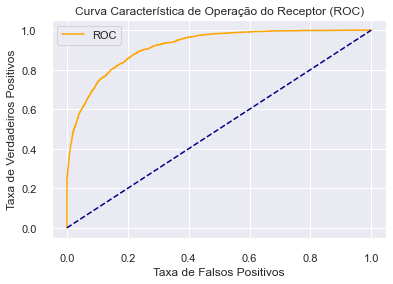

In [33]:
# configurando a curva ROC para plotagem
probs = gbc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)

# 3 - Ajustes de hiperpar√¢metros e Defini√ß√£o do modelo final

Tendo decidido pelo classificador Gradient Boosting, vamos definir um conjunto de poss√≠veis par√¢metros e avaliar o desempenho do modelo para cada valor. Esse processo √© feito automaticamente atrav√©s da **GridSearchCV**.

In [34]:
# dicion√°rio de op√ß√µes de par√¢metros a serem testados pela GridSearchCV
hyper_params = {'learning_rate': [0.1, 0.01],
                'max_depth': [3, 4, 5],
                'min_samples_leaf': [1,2],
                'min_samples_split': [2,3],
                'n_estimators': [10, 30, 100, 300]
               }

In [35]:
# instanciando o objeto gscv para aplica√ß√£o da GridSearch
gscv = GridSearchCV(gbc, hyper_params)

In [36]:
# treinando o modelo com os hiperpar√¢metros definidos
gscv_results = gscv.fit(X_train, y_train)

In [37]:
# dicion√°rio de melhores par√¢metros para o modelo final
gscv_results.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [38]:
# informa a maior pontua√ß√£o da m√©trica atingida no processo
print('Maior pontua√ß√£o atingida: {:.0f}%'.format(gscv_results.best_score_*100))

Maior pontua√ß√£o atingida: 87%


Trazemos a representa√ß√£o final da curva ROC para o modelo calibrado, para evidenciar a qualidade final do modelo.

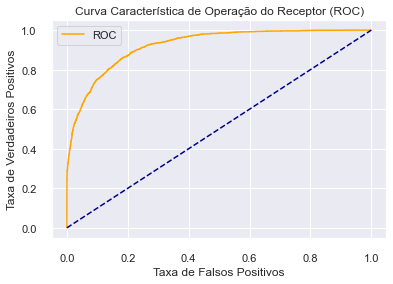

In [39]:
# configurando a curva ROC para plotagem
probs = gscv_results.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)

Salvamos o modelo final no arquivo indicado, em formato .obj, atrav√©s do m√≥dulo **joblib**, que entre outras op√ß√µes permite a preserva√ß√£o em disco de objetos Python para posterior carregamento, se necess√°rio.

In [40]:
# salva modelo final no arquivo indicado
joblib.dump(gscv_results, './data/DSChallenge_best_model.obj')

['./data/DSChallenge_best_model.obj']

Concluimos a defini√ß√£o do nosso modelo preditivo, que est√° pronto para produ√ß√£o, com um desempenho consideravelmente bom, de acordo com as m√©tricas definidas.

# 4 - Aplicando o modelo final sobre os dados de teste do desafio

Carregamos os dados propostos no desafio para o teste do modelo, e realizamos no novo conjunto de dados, todos os processos de prepara√ß√£o que foram descritos nas etapas iniciais do trabalho.

In [41]:
# carrega arquivo de teste proposto
df_pred = pd.read_csv('./data/wage_test.csv')
# elimina coluna de √≠ndice num√©rico desnecess√°ria
df_pred.drop('Unnamed: 0', axis=1, inplace=True)
# substituindo os valores faltantes pelas respectivas modas
df_pred['workclass'].replace(' ?', ' Private', inplace=True)
df_pred['native_country'].replace(' ?', ' United-States', inplace=True)
# corrigindo os valores n√£o conformes na vari√°vel 'native_country'
df_pred['native_country'].replace({' Hong':' Hong-Kong', ' Columbia': ' Colombia'}, inplace=True)
# eliminando os registros que ainda cont√©m ' ?' na vari√°vel 'occupation'
df_pred = df_pred[(df_pred['occupation'] != ' ?')]
# removendo coluna
df_pred.drop('fnlwgt', axis=1, inplace=True)
# separando o conjunto de dados em vari√°veis preditoras e vari√°vel resposta
features_pred_init_df = df_pred.copy()
features_pred_init_df.drop('education', axis=1, inplace=True)


Continuamos operando sobre os novos dados, dessa vez fazendo as transforma√ß√µes e codifica√ß√µes para adequa√ß√£o para o modelo final treinado.

In [42]:
# aplicando a fun√ß√£o logar√≠tmica para transformar os dados 
features_pred_log_df = features_pred_init_df.copy()
# log(x+1) √© um leve ajuste para lidar com o valor indefinido de log(0)
features_pred_log_df[skewed_cols] = features_pred_init_df[skewed_cols].apply(lambda x: np.log(x+1))
# instanciando um normalizador para aplicar sobre os dados
scaler = MinMaxScaler() # escala padr√£o sendo de 0 a 1
# aplicando a normaliza√ß√£o nas vari√°veis preditoras num√©ricas
features_pred_log_normalized_df = features_pred_log_df.copy()
features_pred_log_normalized_df[numerical] = scaler.fit_transform(features_pred_log_df[numerical])
# codificando os dados em 'features_log_normalized' 
features_pred_df = pd.get_dummies(features_pred_log_normalized_df) # One-Hot Encoding

O modelo final √© carregado e aplicado sobre os novos dados, e o arquivo de respostas finais √© gerado no caminho defido abaixo:

In [43]:
# carrega o modelo salvo no arquivo
model_run = joblib.load('./data/DSChallenge_best_model.obj')

# armazena o resultado das predi√ß√µes num array NumPy
results = model_run.predict(features_pred_df)

predict_df = features_pred_df.copy()
# adicionando os resultados da predi√ß√£o ao dataframe dos dados de predi√ß√£o
predict_df['predictedValues'] = results.tolist()


In [44]:
# escreve arquivo cvs, a partir do dataframe, com as colunas formatadas
pd.DataFrame(predict_df).to_csv('./data/predicted.csv',index=True, index_label='rowNumber', columns=['predictedValues'])


    Assim conclu√≠mos o desafio proposto, numa jornada de aprendizado (n√£o s√≥ de m√°quina üòâ) que durou longos dias e noites, e chega ao fim com a sensa√ß√£o de objetivo cumprido. Obrigado por me acompanhar at√© aqui, e at√© breve!